In [1]:
using DelimitedFiles
using PyPlot
using LaTeXStrings

In [2]:
data = readdlm("results.csv",',',skipstart=1)
mdata = data[findall(!=("LES"), data[:,4]),:]
data

25×7 Array{Any,2}:
 "Round"     38   12  "TIP"         5.04e11    3.246       0.0
 "Round"     38   12  "Top Hat"     5.6e11     1.789      -0.1
 "Round"     38   12  "Multi-zone"  5.9e11     2.762      -0.15
 "Round"     38   12  "Bastankhah"  4.64e11    4.273       0.09
 "Round"     38   12  "LES"         4.74e11    3.1104e11   0.06
 "Round"     38   36  "TIP"         5.08e11    3.354       0.0
 "Round"     38   36  "Top Hat"     5.6e11     6.968      -0.09
 "Round"     38   36  "Multi-zone"  5.84e11    7.589      -0.13
 "Round"     38   36  "Bastankhah"  4.47e11   11.968       0.14
 "Amalia"    60   36  "TIP"         3.63e11    3.537       0.0
 "Amalia"    60   36  "Top Hat"     4.23e11    8.379      -0.14
 "Amalia"    60   36  "Multi-zone"  4.39e11   16.386      -0.17
 "Amalia"    60   36  "Bastankhah"  3.54e11   19.514       0.02
 "Amalia"    60   72  "TIP"         9.13e11    3.836       0.0
 "Amalia"    60   72  "Top Hat"     9.88e11   15.903      -0.08
 "Amalia"    60   72  "Mul

In [3]:
farm = mdata[:,1]
turbines = mdata[:,2]
directions = mdata[:,3]
model = mdata[:,4]
aep = mdata[:,5]
time = mdata[:,6]
error = mdata[:,7].*100; 

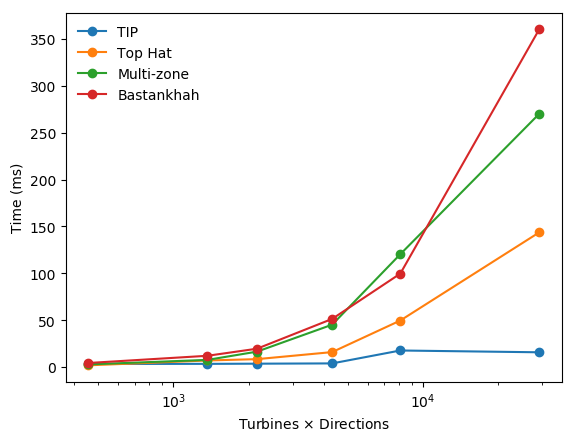

In [4]:
# plot time vs d*t
tiptime = time[findall(==("TIP"),model)]
thtime = time[findall(==("Top Hat"),model)]
mztime = time[findall(==("Multi-zone"),model)]
btime = time[findall(==("Bastankhah"),model)]

dt = turbines[findall(==("TIP"),model)].*directions[findall(==("TIP"),model)]

semilogx(dt,tiptime, "-o", label="TIP")
semilogx(dt,thtime, "-o", label="Top Hat")
semilogx(dt,mztime, "-o", label="Multi-zone")
semilogx(dt,btime, "-o", label="Bastankhah")
xlabel(L"Turbines $\times$ Directions")
ylabel("Time (ms)")
legend(frameon=false)
savefig("time.pdf")
show()

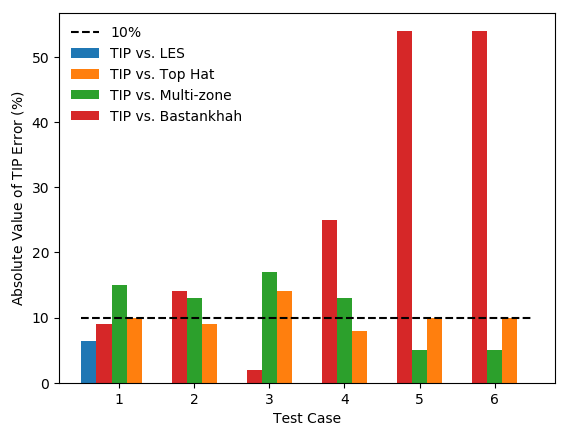

In [5]:
# plot error
width = 0.2
tiperror = abs.(error[findall(==("TIP"),model)])
therror = abs.(error[findall(==("Top Hat"),model)])
mzerror = abs.(error[findall(==("Multi-zone"),model)])
berror = abs.(error[findall(==("Bastankhah"),model)])
LESAEP = data[findall(==("LES"),data[:,4]),:][5]
LESerror = 100*(aep[1]-LESAEP)/LESAEP

myplot = plot()
bar([1-2*width],[LESerror], width=width, label="TIP vs. LES")
bar(collect(1:6).+width,therror,width=width, label="TIP vs. Top Hat")
bar(collect(1:6),mzerror, width=width, label="TIP vs. Multi-zone")
bar(collect(1:6).-width,berror, width=width, label="TIP vs. Bastankhah")
labels = dt
plot([0.5,6.5],[10,10],"--k", label =L"$10 \% $")
xlabel("Test Case")
ylabel(L"Absolute Value of TIP Error $(\%)$")
legend(frameon=false)
# myplot[:fg_grid] = true
savefig("error.pdf")
show()